# **Bengaluru Real Estate Price Prediction Project**

***

# Content

1. Project Overview (Predicting House Prices)
2. Getting Started
3. Exploratory Data Analysis (EDA)
4. Outliers
5. Feature Engineering
6. Preparing Final DataFrame for Modeling
7. Model Building and Evaluation
8. Comparing Models
9. Saving the Model

# Project Overview (Predicting House Prices)

## Objective

This project aims to develop a predictive model capable of accurately estimating house prices based on various features. By leveraging machine learning techniques, the model provides valuable insights for real estate professionals, investors, and potential homebuyers.

## Methodology

- **Data Acquisition and Exploration**: A comprehensive dataset containing relevant house characteristics (e.g., square feet, number of bedrooms, location) and corresponding sale prices was gathered. Exploratory data analysis (EDA) was conducted to understand the distribution of variables, identify correlations, and uncover potential patterns.

- **Data Cleaning and Preprocessing**: The dataset was meticulously cleaned to handle missing values, inconsistencies, and outliers. Data transformations (e.g., normalization, scaling) were applied to ensure compatibility with machine learning algorithms.

- **Feature Engineering**: Existing features were transformed to capture more meaningful relationships and enhance model performance. This involved techniques such as one-hot encoding for categorical variables.

- **Model Development and Training**: Several machine learning models were implemented and trained on the prepared dataset:
    - Linear Regression: A baseline model to establish a simple relationship between features and target variable.
    - XGBoost: A gradient boosting ensemble method known for its efficiency and accuracy in handling complex datasets.
    - Decision Trees: A non-parametric model that can capture nonlinear relationships and provide interpretable decision rules.
    - Neural Networks: A flexible architecture capable of learning complex patterns and handling large-scale datasets.

- **Model Evaluation and Selection**: The performance of each model was evaluated using appropriate metrics (e.g., mean squared error, R-squared) to assess accuracy and generalization capabilities. The best-performing model was selected based on its ability to predict house prices effectively.

## Expected Outcomes

The project delivers a robust and reliable predictive model capable of estimating house prices with reasonable accuracy. The insights gained from this model can be utilized by various stakeholders to make informed decisions regarding real estate investments and property valuations.



---



# Getting Started

In [142]:
# importing libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, cross_val_score

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras

import pickle


In [143]:
# plotting theme and palette

plt.style.use('fivethirtyeight')
color_palette = sns.color_palette()
%matplotlib inline


In [144]:
# read data

df = pd.read_csv('/content/bengaluru_house_prices.csv')


# Exploratory Data Analysis (EDA)

In [145]:
df


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [146]:
# exploring nulls by column
df.isnull().sum()


,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [147]:
# remove columns that contain too many nulls and won't be effective
df = df.drop(['availability', 'society', 'balcony'], axis = 'columns')
df.head()


,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [148]:
# check nulls after removing not needed columns
df.isnull().sum()


,0
area_type,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [149]:
# remove rows that have nulls (few rows so can be removed)
df = df.dropna(axis = 'rows')
df.shape


(13246, 6)

## Columns Data Type

In [150]:
df.dtypes


,0
area_type,object
location,object
size,object
total_sqft,object
bath,float64
price,float64


### size

In [151]:
# display unique values in size column
df['size'].unique()


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [152]:
# splitting numbers from strings in bhk column
df[['bhk', 'bhk_copy']] = df['size'].str.split(' ', expand = True)
df = df.drop(columns = ['size', 'bhk_copy'])
df['bhk'] = df['bhk'].astype('float')
df.head()


,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Super built-up Area,Kothanur,1200,2.0,51.00,2.0


### total_sqft

In [153]:
# check data type of total_sqft column
df['total_sqft'].dtypes


dtype('O')

In [154]:
def check_float(x):
    """
    display all values that are not float in total_sqft column
    """
    try:
        float(x)
        return np.NaN
    except:
        return x


In [155]:
# display non float values in total_sqft column
df['total_sqft'].apply(check_float).unique()


array([nan, '2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1

In [156]:
def to_float(x):
    """
    converts a string value to a float.

    handles strings with hyphens by taking the average of the two numbers
    returns None if the string cannot be converted to a float

    Args:
        x: the string value to convert

    Returns:
        the converted float value, or None if the conversion fails
    """
    try:                      # Attempt to convert directly to float
        return float(x)
    except:                   # Handle cases where conversion fails
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        elif '-' not in x:
            return None


In [157]:
# use to_float function to convert total_sqft column to float
df['total_sqft'] = df['total_sqft'].apply(to_float)


In [158]:
df['total_sqft'].isnull().sum()


46

In [159]:
# drop nulls per row (too few nulls)
df = df.dropna(axis = 'rows')
df.shape


(13200, 6)

In [160]:
# now total_sqft col become numeric
df['total_sqft'].dtype


dtype('float64')

# Outliers

## bhk Column

In [161]:
# descriptive stats of bhk column
df['bhk'].describe()


,bhk
count,13200.000000
mean,2.800833
std,1.292843
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,43.000000


In [162]:
# value counts in bhk column
df['bhk'].value_counts().sort_index()


,count
bhk,
1.0,640
2.0,5517
3.0,4818
4.0,1390
5.0,349
6.0,220
7.0,100
8.0,88
9.0,52


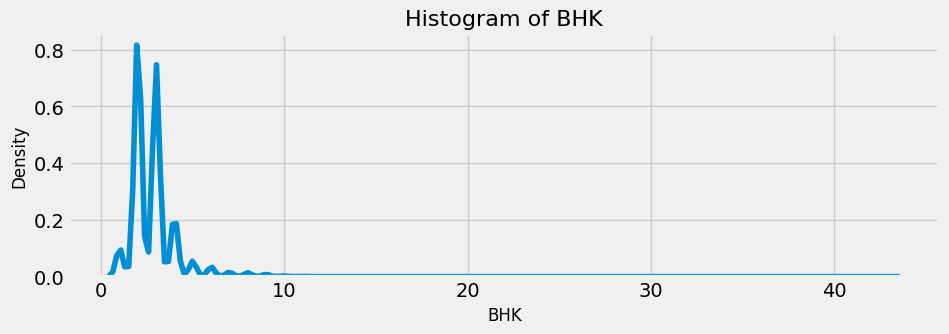

In [163]:
# visualizing bhk data distribution
plt.figure(figsize = (10,3))
sns.kdeplot(df['bhk'])
plt.title('Histogram of BHK', fontsize = 16)
plt.xlabel('BHK', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()


In [164]:
# remove outliers from df according to the descriptive stats and distribution of bhk column
df = df[df['bhk'] <= 10.0]
df['bhk'].unique(), df.shape


(array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5.,  9., 10.]), (13188, 6))

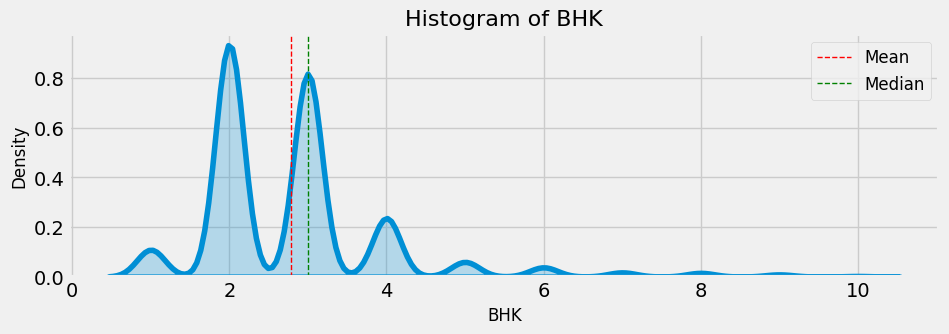

In [165]:
# visualizing bhk data distribution after removing outliers
stats = df['bhk'].describe()
plt.figure(figsize = (10,3))
sns.kdeplot(df['bhk'], linewidth = 4, fill = True)
plt.axvline(stats['mean'], color = 'red', linestyle = 'dashed', linewidth = 1, label = 'Mean')
plt.axvline(stats['50%'], color = 'green', linestyle = 'dashed', linewidth = 1, label = 'Median')
plt.title('Histogram of BHK', fontsize = 16)
plt.xlabel('BHK', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.legend(fontsize = 12)
plt.show()


## total_sqft Column

In [166]:
# descriptive statistics for total_sqft column
df['total_sqft'].describe()


,total_sqft
count,13188.000000
mean,1553.237014
std,1232.934578
min,1.000000
25%,1100.000000
50%,1275.000000
75%,1670.000000
max,52272.000000


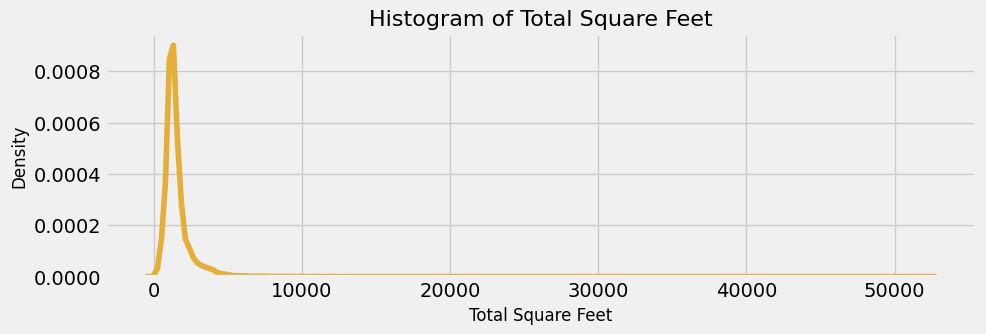

In [167]:
# visualizing total sqft data distribution
plt.figure(figsize = (10,3))
sns.kdeplot(df['total_sqft'], color = color_palette[2])
plt.title('Histogram of Total Square Feet', fontsize = 16)
plt.xlabel('Total Square Feet', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()


In [168]:
# remove outliers from df according to the descriptive stats and distribution of total_sqft column
df = df[(df['total_sqft'] > 500.0) & (df['total_sqft'] < 10000.0)]
df.shape


(13008, 6)

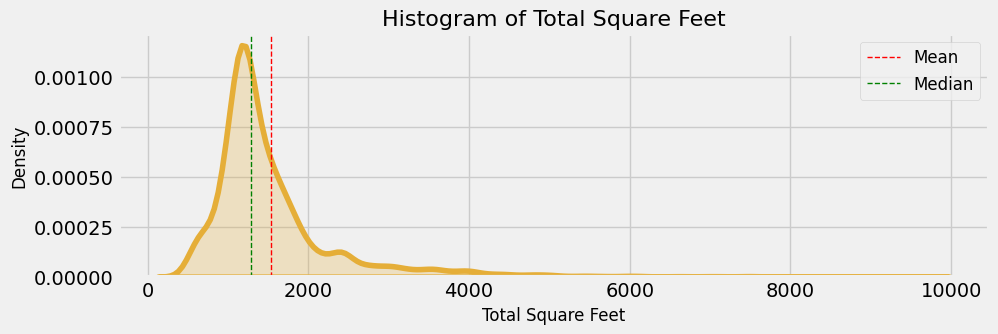

In [169]:
# visualizing total sqft data distribution after removing outliers
stats = df['total_sqft'].describe()
plt.figure(figsize = (10,3))
sns.kdeplot(df['total_sqft'], linewidth = 4, fill = True, color = color_palette[2])
plt.axvline(stats['mean'], color = 'red', linestyle = 'dashed', linewidth = 1, label = 'Mean')
plt.axvline(stats['50%'], color = 'green', linestyle = 'dashed', linewidth = 1, label = 'Median')
plt.title('Histogram of Total Square Feet', fontsize = 16)
plt.xlabel('Total Square Feet', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.legend(fontsize = 12)
plt.show()


## Location Column

In [170]:
# stats for location column
df['location'].describe()


,location
count,13008
unique,1271
top,Whitefield
freq,529


In [171]:
# counts of unique values in location column
df['location'].value_counts()


,count
location,
Whitefield,529
Sarjapur Road,389
Electronic City,299
Kanakpura Road,260
Thanisandra,232
...,...
kanakapura main road,1
t.c palya,1
Manganahalli,1


In [172]:
# filter outliers according to locations that have value count below a threshold
locations = pd.DataFrame(df['location'].value_counts())

locations = (
    locations
    .reset_index()
    .rename(columns = {'count': 'location_count'})
    .query('location_count < 10')
    )

locations


,location,location_count
250,Banagiri Nagar,9
251,Chennammana Kere,9
252,B Narayanapura,9
253,Kaverappa Layout,9
254,Vishwanatha Nagenahalli,9
...,...,...
1266,kanakapura main road,1
1267,t.c palya,1
1268,Manganahalli,1
1269,Housing Board Layout Vijay Nagar,1


In [173]:
# removing outliers from df according to location column

df['location'] = df['location'].apply(
    lambda x: None if x in list(locations['location']) else x
)

df = df.dropna(subset = ['location'])
df.shape


(10304, 6)

## area_type Column

In [174]:
# area type column value counts
df['area_type'].value_counts()


,count
area_type,
Super built-up Area,7338
Built-up Area,1718
Plot Area,1202
Carpet Area,46


## bath Column

In [175]:
# bath column value counts
df['bath'].value_counts().sort_index()


,count
bath,
1.0,514
2.0,5655
3.0,2569
4.0,884
5.0,364
6.0,181
7.0,61
8.0,38
9.0,25


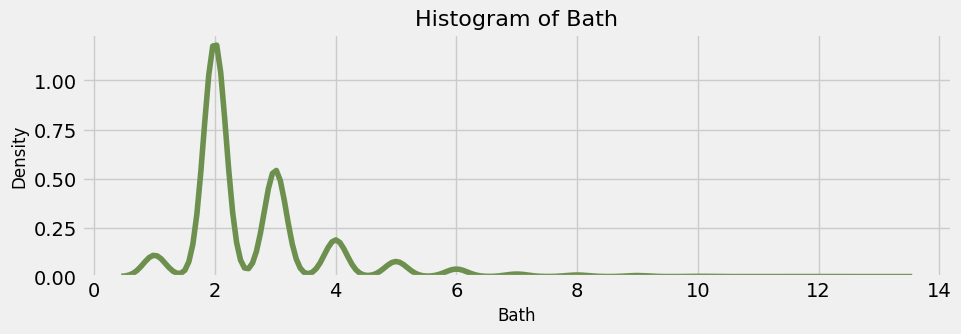

In [176]:
# visualizing bath data distribution
plt.figure(figsize = (10,3))
sns.kdeplot(df['bath'], color = color_palette[3])
plt.title('Histogram of Bath', fontsize = 16)
plt.xlabel('Bath', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()


In [177]:
# remove outliers according to the descriptive stats and distribution of bath column
df['bath'].unique(), df.shape


(array([ 2.,  5.,  3.,  4.,  1.,  9.,  8.,  6.,  7., 11., 12., 10., 13.]),
 (10304, 6))

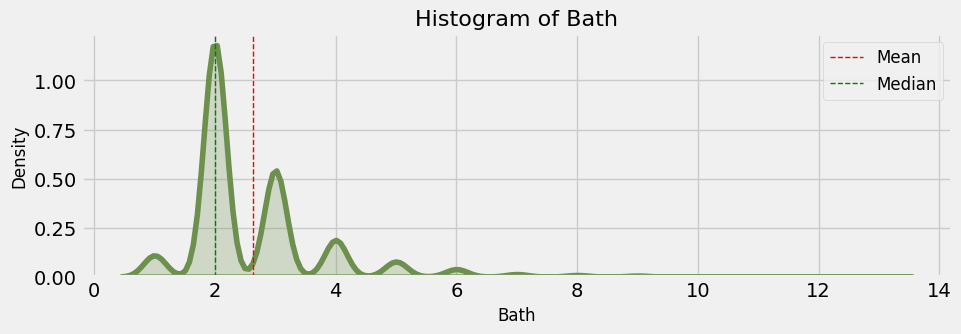

In [178]:
# visualizing bath data distribution after removing outliers
stats = df['bath'].describe()
plt.figure(figsize = (10,3))
sns.kdeplot(df['bath'], linewidth = 4, fill = True, color = color_palette[3])
plt.axvline(stats['mean'], color = 'red', linestyle = 'dashed', linewidth = 1, label = 'Mean')
plt.axvline(stats['50%'], color = 'green', linestyle = 'dashed', linewidth = 1, label = 'Median')
plt.title('Histogram of Bath', fontsize = 16)
plt.xlabel('Bath', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.legend(fontsize = 12)
plt.show()


## price Column

In [179]:
# descriptive stats of price column
df['price'].describe()


,price
count,10304.000000
mean,103.867577
std,116.766329
min,10.500000
25%,49.500000
50%,70.000000
75%,115.000000
max,2736.000000


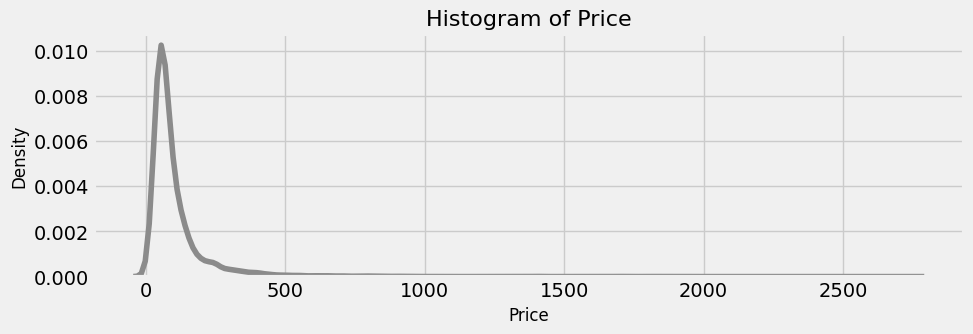

In [180]:
# visualizing price data distribution
plt.figure(figsize = (10,3))
sns.kdeplot(df['price'], color = color_palette[4])
plt.title('Histogram of Price', fontsize = 16)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()


In [181]:
# remove outliers according to the descriptive stats and distribution of price column
df = df[df['price'] < 1000.0]
df.shape


(10285, 6)

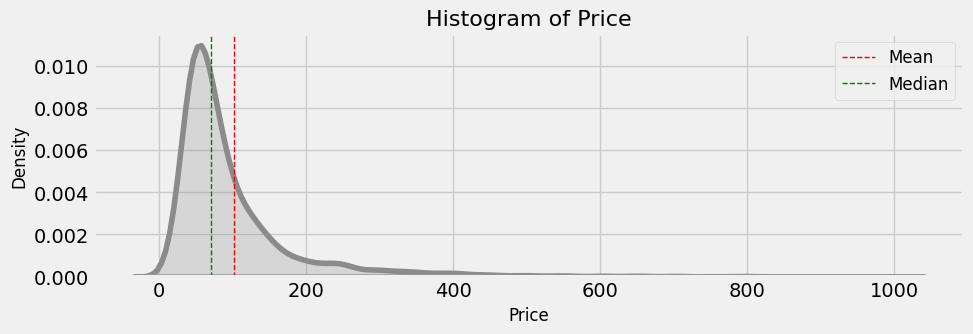

In [182]:
# visualizing price data distribution after removing outliers
stats = df['price'].describe()
plt.figure(figsize = (10,3))
sns.kdeplot(df['price'], linewidth = 4, fill = True, color = color_palette[4])
plt.axvline(stats['mean'], color = 'red', linestyle = 'dashed', linewidth = 1, label = 'Mean')
plt.axvline(stats['50%'], color = 'green', linestyle = 'dashed', linewidth = 1, label = 'Median')
plt.title('Histogram of Price', fontsize = 16)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.legend(fontsize = 12)
plt.show()


# Feature Engineering

## price & total_sqft columns

In [183]:
# descriptive stats of price column
df['price'].describe()


,price
count,10285.00000
mean,101.13092
std,96.54937
min,10.50000
25%,49.50000
50%,70.00000
75%,113.00000
max,995.00000


In [184]:
# descriptive stats of total sqft column
df['total_sqft'].describe()


,total_sqft
count,10285.000000
mean,1510.438202
std,759.330371
min,502.000000
25%,1105.000000
50%,1280.000000
75%,1662.000000
max,9600.000000


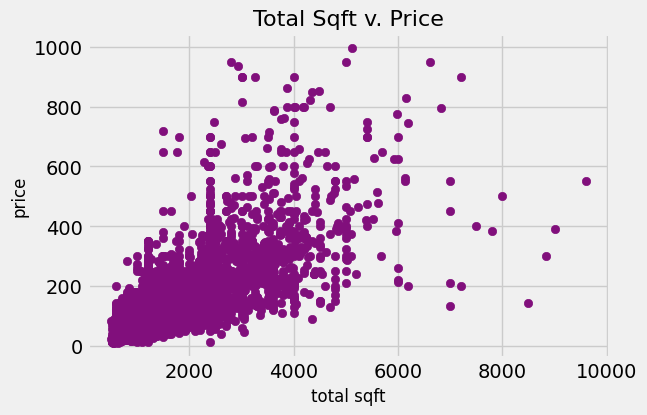

In [185]:
# visualizing total sqft data points v. price data points (correlation)
plt.figure(figsize = (6,4))
plt.scatter(df['total_sqft'], df['price'], color = color_palette[5])
plt.title('Total Sqft v. Price', fontsize = 16)
plt.xlabel('total sqft', fontsize = 12)
plt.ylabel('price', fontsize = 12)
plt.show()


In [186]:
# try fitting line of total_sqft and price

X = df[['total_sqft']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
test_model = LinearRegression().fit(X_train, y_train)
test_model.score(X_train, y_train), test_model.score(X_test, y_test)


(0.5594816144154267, 0.5709568935144409)

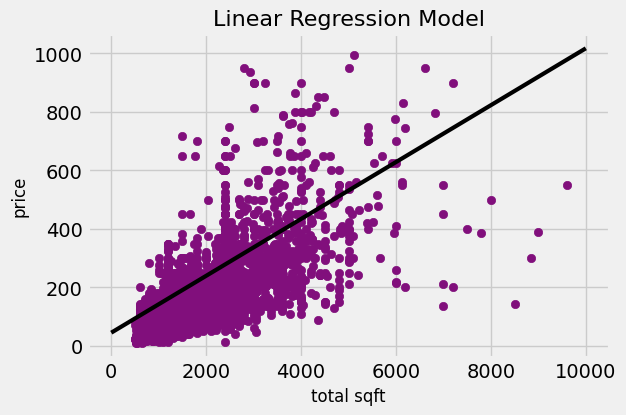

In [187]:
# plotting the model to check the fitting

k = np.linspace(0, 10000, 1000)
z = test_model.coef_ * k - test_model.intercept_

plt.figure(figsize = (6,4))
plt.scatter(df['total_sqft'], df['price'], color = color_palette[5])
plt.plot(k, z, color = 'k', lw = 3)
plt.xlabel('total sqft', fontsize = 12)
plt.ylabel('price', fontsize = 12)
plt.title('Linear Regression Model', fontsize = 16)
plt.show()


In [188]:
# use a new feature of price_per_sqft
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df['price_per_sqft'].describe()


,price_per_sqft
count,10285.000000
mean,6281.864177
std,3525.408716
min,500.000000
25%,4230.769231
50%,5333.333333
75%,6969.508401
max,47994.652406


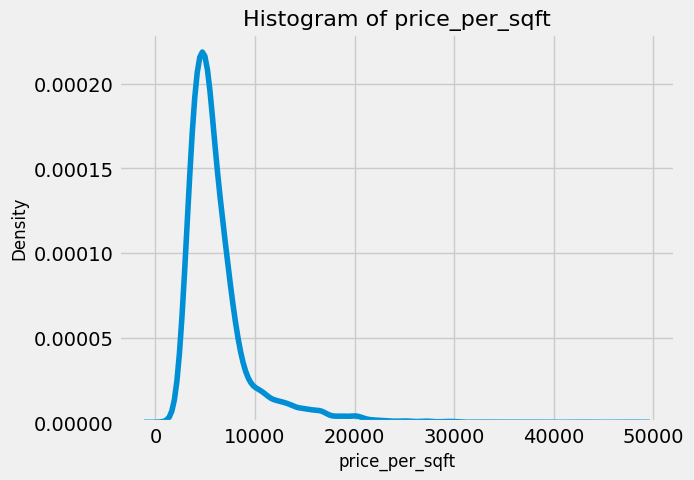

In [189]:
# visualizing price_per_sqft data distribution
plt.figure(figsize = (10,3))
sns.kdeplot(df['price_per_sqft'])
plt.title('Histogram of price_per_sqft', fontsize = 16)
plt.xlabel('price_per_sqft', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()


In [190]:
# remove outliers according to the descriptive stats and distribution of price_per_sqft column
df = df[(df['price_per_sqft'] > 4000.0) & (df['price_per_sqft'] < 9000.0)]
df.shape


(6879, 7)

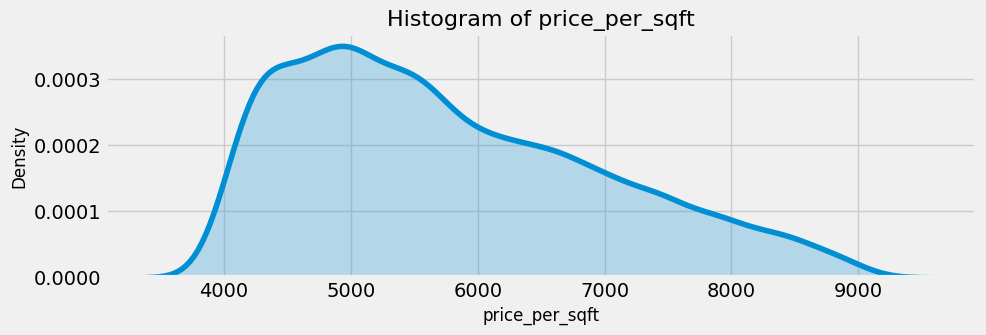

In [191]:
# visualizing price_per_sqft data distribution after removing outliers
plt.figure(figsize = (10,3))
sns.kdeplot(df['price_per_sqft'], linewidth = 4, fill = True)
plt.title('Histogram of price_per_sqft', fontsize = 16)
plt.xlabel('price_per_sqft', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()


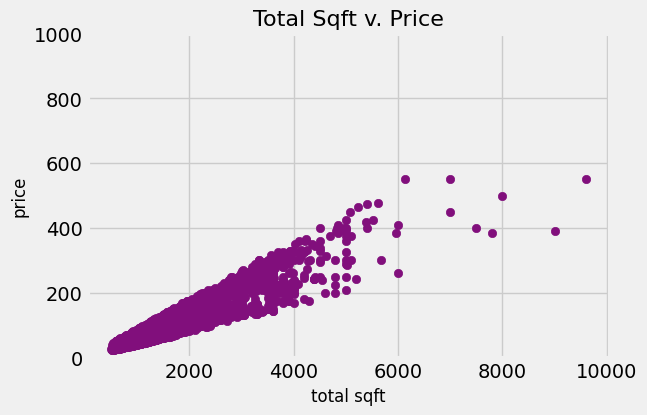

In [192]:
# visualize total_sqft v. price after removing outliers
plt.figure(figsize = (6,4))
plt.scatter(df['total_sqft'], df['price'], color = color_palette[5])
plt.ylim(0, 1000)
plt.title('Total Sqft v. Price', fontsize = 16)
plt.xlabel('total sqft', fontsize = 12)
plt.ylabel('price', fontsize = 12)
plt.show()


In [193]:
# try fitting line of total_sqft and price after removing outlier

X = df[['total_sqft']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
test_model = LinearRegression().fit(X_train, y_train)
test_model.score(X_train, y_train), test_model.score(X_test, y_test)


(0.8530266818072682, 0.8270321486106629)

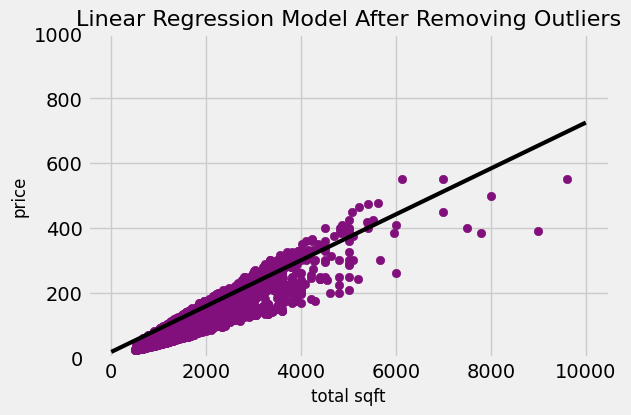

In [194]:
# plotting the model to check the fitting

k = np.linspace(0, 10000, 1000)
z = test_model.coef_ * k - test_model.intercept_

plt.figure(figsize = (6,4))
plt.scatter(df['total_sqft'], df['price'], color = color_palette[5])
plt.plot(k, z, color = 'k', lw = 3)
plt.ylim(0, 1000)
plt.xlabel('total sqft', fontsize = 12)
plt.ylabel('price', fontsize = 12)
plt.title('Linear Regression Model After Removing Outliers', fontsize = 16)
plt.show()


## total_sqft & bhk Columns (sqft_per_bhk)

In [195]:
# descriptive stats of total_sqft column
df['total_sqft'].describe()


,total_sqft
count,6879.000000
mean,1511.087370
std,696.187452
min,502.000000
25%,1133.000000
50%,1320.000000
75%,1691.000000
max,9600.000000


In [196]:
# descriptive stats of bhk column
df['bhk'].describe()


,bhk
count,6879.000000
mean,2.610990
std,0.867745
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,10.000000


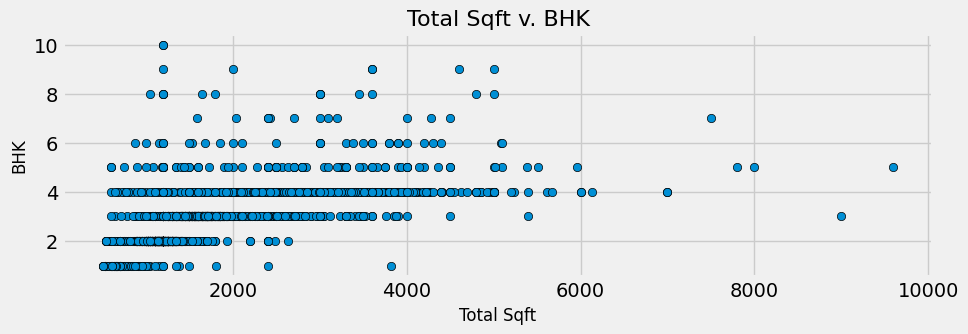

In [197]:
# visualize bhk v total_sqft
plt.figure(figsize = (10,3))
plt.scatter(df['total_sqft'], df['bhk'], edgecolor = 'k')
plt.title('Total Sqft v. BHK', fontsize = 16)
plt.xlabel('Total Sqft', fontsize = 12)
plt.ylabel('BHK', fontsize = 12)
plt.show()


In [198]:
# create a new feature of sqft_per_bhk
df['sqft_per_bhk'] = df['total_sqft'] / df['bhk']
df['sqft_per_bhk'].describe()


,sqft_per_bhk
count,6879.000000
mean,581.020349
std,152.276537
min,120.000000
25%,501.500000
50%,569.666667
75%,631.500000
max,3820.000000


In [199]:
# remove outliers according to the descriptive stats and distribution of sqft_per_bhk column
df = df[(df['sqft_per_bhk'] > 200) & (df['sqft_per_bhk'] < 1000)]
df.shape


(6725, 8)

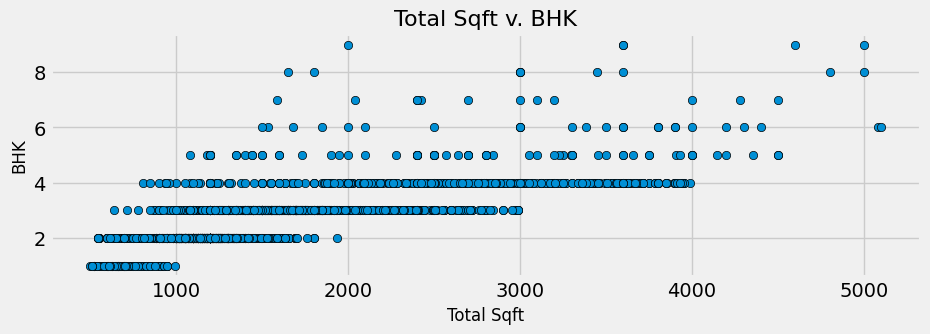

In [200]:
# visualize bhk v. total_sqft after removing outliers
plt.figure(figsize = (10,3))
plt.scatter(df['total_sqft'], df['bhk'], edgecolor = 'k')
plt.title('Total Sqft v. BHK', fontsize = 16)
plt.xlabel('Total Sqft', fontsize = 12)
plt.ylabel('BHK', fontsize = 12)
plt.show()


## bath & bhk Columns

In [201]:
# create a new feature of bath_bhk to tune the number of baths according to the number of bhk
df.loc[:, 'bath_bhk'] = df['bath'] - df['bhk']


In [202]:
# display different values for bath_bhk column
df['bath_bhk'].value_counts().sort_index()


,count
bath_bhk,
-4.0,1
-3.0,4
-2.0,23
-1.0,929
0.0,5414
1.0,299
2.0,54
3.0,1


In [203]:
len(df[df['bath_bhk'] > 1])


55

In [204]:
# remove outliers according to bath_bhk column
df = df[df['bath_bhk'] <= 1]
df.shape


(6670, 9)

# Preparing Final DataFrame for Modeling

In [205]:
df.head()


,area_type,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk,bath_bhk
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.0,4.0,4615.384615,650.0,1.0
2,Built-up Area,Uttarahalli,1440.0,2.0,62.0,3.0,4305.555556,480.0,-1.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.0,3.0,6245.890861,507.0,0.0
4,Super built-up Area,Kothanur,1200.0,2.0,51.0,2.0,4250.000000,600.0,0.0
6,Super built-up Area,Old Airport Road,2732.0,4.0,204.0,4.0,7467.057101,683.0,0.0


## Removing bath_bhk Column

In [206]:
df = df.drop(columns = ['bath_bhk'])
df.head()


,area_type,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.0,4.0,4615.384615,650.0
2,Built-up Area,Uttarahalli,1440.0,2.0,62.0,3.0,4305.555556,480.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.0,3.0,6245.890861,507.0
4,Super built-up Area,Kothanur,1200.0,2.0,51.0,2.0,4250.000000,600.0
6,Super built-up Area,Old Airport Road,2732.0,4.0,204.0,4.0,7467.057101,683.0


## Scaling Data

In [207]:
for col in df.columns:
  if df[col].dtype == 'float64':
    if col != 'price':
      df[col] = df[col]/df[col].max()

df.head()


,area_type,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk
1,Plot Area,Chikka Tirupathi,0.509804,0.555556,120.0,0.444444,0.513077,0.651629
2,Built-up Area,Uttarahalli,0.282353,0.222222,62.0,0.333333,0.478634,0.481203
3,Super built-up Area,Lingadheeranahalli,0.298235,0.333333,95.0,0.333333,0.694335,0.508271
4,Super built-up Area,Kothanur,0.235294,0.222222,51.0,0.222222,0.472458,0.601504
6,Super built-up Area,Old Airport Road,0.535686,0.444444,204.0,0.444444,0.830088,0.684712


## One Hot Encoding

### Location Column

In [208]:
dummy_locations= pd.get_dummies(df['location'])
dummy_locations.head(1)


,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [209]:
dummy_locations.columns


Index([' Devarachikkanahalli', '1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=246)

In [210]:
dummy_locations = dummy_locations.drop(' Devarachikkanahalli', axis = 'columns')
dummy_locations.head(1)


,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [211]:
df = pd.concat([df, dummy_locations], axis = 'columns')
df.head(1)


,area_type,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk,1st Block Jayanagar,1st Block Koramangala,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Plot Area,Chikka Tirupathi,0.509804,0.555556,120.0,0.444444,0.513077,0.651629,False,False,...,False,False,False,False,False,False,False,False,False,False


In [212]:
df = df.drop('location', axis = 'columns').reset_index(drop = True)
df.head()


,area_type,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Plot Area,0.509804,0.555556,120.0,0.444444,0.513077,0.651629,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Built-up Area,0.282353,0.222222,62.0,0.333333,0.478634,0.481203,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Super built-up Area,0.298235,0.333333,95.0,0.333333,0.694335,0.508271,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,0.235294,0.222222,51.0,0.222222,0.472458,0.601504,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,0.535686,0.444444,204.0,0.444444,0.830088,0.684712,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Area Type Column

In [213]:
dummy_areas = pd.get_dummies(df['area_type'])
dummy_areas.head(1)


,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,False,False,True,False


In [214]:
dummy_areas.columns


Index(['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area'], dtype='object')

In [215]:
dummy_areas = dummy_areas.drop('Carpet  Area', axis = 'columns')
dummy_areas.head(1)


,Built-up Area,Plot Area,Super built-up Area
0,False,True,False


In [216]:
df = pd.concat([df, dummy_areas], axis = 'columns')
df.head(1)


,area_type,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
0,Plot Area,0.509804,0.555556,120.0,0.444444,0.513077,0.651629,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [217]:
df = df.drop('area_type', axis = 'columns').reset_index(drop = True)
df.head()


,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
0,0.509804,0.555556,120.0,0.444444,0.513077,0.651629,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.282353,0.222222,62.0,0.333333,0.478634,0.481203,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.298235,0.333333,95.0,0.333333,0.694335,0.508271,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.235294,0.222222,51.0,0.222222,0.472458,0.601504,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.535686,0.444444,204.0,0.444444,0.830088,0.684712,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# Model Building and Evaluation

## Final DataFrame

In [218]:
df


,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
0,0.509804,0.555556,120.00,0.444444,0.513077,0.651629,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.282353,0.222222,62.00,0.333333,0.478634,0.481203,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.298235,0.333333,95.00,0.333333,0.694335,0.508271,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.235294,0.222222,51.00,0.222222,0.472458,0.601504,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.535686,0.444444,204.00,0.444444,0.830088,0.684712,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,0.205882,0.222222,52.71,0.222222,0.558057,0.526316,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6666,0.263725,0.222222,57.00,0.333333,0.471115,0.449457,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6667,0.336275,0.333333,112.00,0.333333,0.725986,0.573099,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6668,0.677059,0.444444,231.00,0.555556,0.743687,0.692331,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False


## Machine Learning Models

In [219]:
X = df.drop(columns = ['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)


In [220]:
def select_model(model_name):
  """
  Selects a pre-defined model (identified by its name) and evaluates
  its performance on the provided training and testing data.

  Args:
      model_name (str): Name of the pre-defined model to be used.

  Returns:
      pandas.DataFrame: A DataFrame containing the model's performance metrics.
  """

  # picking model
  model = model_name

  # train the model
  model = model.fit(X_train, y_train)

  # get predictions
  y_train_predicted = model.predict(X_train)
  y_test_predicted = model.predict(X_test)

  # model performance evaluation
  print(
      model_name,
      f'Model Score             (train) : {model.score(X_train, y_train)}',
      f'Model Score             (test ) : {model.score(X_test, y_test)}',
      f'Mean Squared Error      (train) : {mean_squared_error(y_train_predicted , y_train)}',
      f'Mean Squared Error      (test ) : {mean_squared_error(y_test_predicted, y_test)}',
      f'Root Mean Squared Error (train) : {np.sqrt(mean_squared_error(y_train_predicted , y_train))}',
      f'Root Mean Squared Error (test ) : {np.sqrt(mean_squared_error(y_test_predicted, y_test))}',
      f'Mean Absolute Error     (train) : {mean_absolute_error(y_train_predicted, y_train)}',
      f'Mean Absolute Error     (test ) : {mean_absolute_error(y_test_predicted, y_test)}',
      sep = '\n'
      )


In [221]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(n_neighbors = 10)
    ]

for model in models:
  select_model(model)
  print()


LinearRegression()
Model Score             (train) : 0.9774385134838676
Model Score             (test ) : 0.9728908533369184
Mean Squared Error      (train) : 41.23140993680296
Mean Squared Error      (test ) : 55.42111037615339
Root Mean Squared Error (train) : 6.421168891783097
Root Mean Squared Error (test ) : 7.444535605137059
Mean Absolute Error     (train) : 3.921602300528308
Mean Absolute Error     (test ) : 4.422791803502199

DecisionTreeRegressor()
Model Score             (train) : 1.0
Model Score             (test ) : 0.9904650404217641
Mean Squared Error      (train) : 3.2169440212910827e-31
Mean Squared Error      (test ) : 19.49297976011994
Root Mean Squared Error (train) : 5.6718110170307e-16
Root Mean Squared Error (test ) : 4.415085475969852
Mean Absolute Error     (train) : 2.6632036572717398e-17
Mean Absolute Error     (test ) : 1.187728635682159

RandomForestRegressor()
Model Score             (train) : 0.9996943584257301
Model Score             (test ) : 0.993693871

## Neural Network Models

In [222]:
X_train = tf.convert_to_tensor(X_train, dtype = tf.int64)
y_train = tf.convert_to_tensor(y_train, dtype = tf.int64)
X_test = tf.convert_to_tensor(X_test, dtype = tf.int64)
X_test = tf.convert_to_tensor(X_test, dtype = tf.int64)


In [223]:
X_train.shape


TensorShape([5336, 253])

In [224]:
input_shape = (253,)


### Model (1)

In [225]:
model1 = keras.Sequential([
    keras.layers.Input(shape = input_shape),
    keras.layers.Dense(100, activation = 'linear'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(1, activation = 'linear')
    ])

model1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [keras.metrics.RootMeanSquaredError()])

history1 = model1.fit(X_train, y_train, epochs = 30)


Epoch 1/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7321.3022 - root_mean_squared_error: 85.0782
Epoch 2/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1852.9928 - root_mean_squared_error: 42.9494
Epoch 3/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1504.9771 - root_mean_squared_error: 38.7685
Epoch 4/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1457.9884 - root_mean_squared_error: 38.1725
Epoch 5/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1437.6305 - root_mean_squared_error: 37.8956
Epoch 6/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1340.6661 - root_mean_squared_error: 36.6006
Epoch 7/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1471.9915 - root_mean_squared_error: 38.3332
Epoch 8/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1360.9089 - root_mean_squared_error: 36.8785
Epoch 9/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1385.7362 - root_mean_squared_error: 37.2064
Epoch 10/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - 

In [226]:
model1.evaluate(X_test, y_test)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1869.8771 - root_mean_squared_error: 43.1072 


[1735.5277099609375, 41.659664154052734]

In [227]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(0.26594586905027096, 0.15106940699948812)

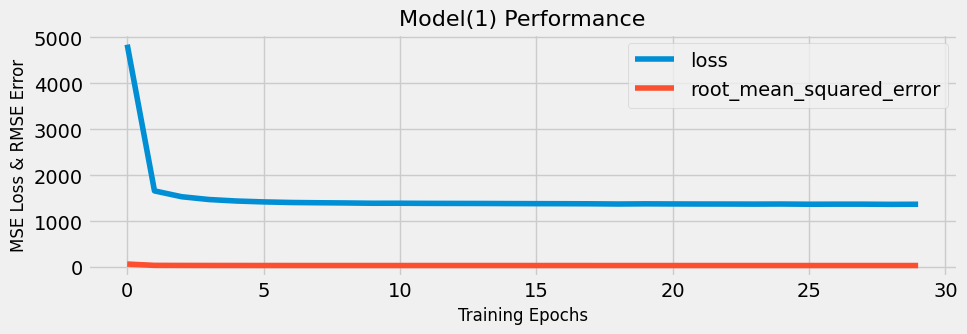

In [228]:
pd.DataFrame(history1.history).plot(figsize = (10,3))
plt.gca()
plt.title('Model(1) Performance', fontsize = 16)
plt.xlabel('Training Epochs', fontsize = 12)
plt.ylabel('MSE Loss & RMSE Error', fontsize = 12)
plt.show()


### Model (2)

In [229]:
model2 = keras.Sequential([
    keras.layers.Input(shape = input_shape),
    keras.layers.Dense(100, activation = 'linear'),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(1, activation = 'linear')
    ])

model2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [keras.metrics.RootMeanSquaredError()])

history2 = model2.fit(X_train, y_train, epochs = 30)


Epoch 1/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3810.4014 - root_mean_squared_error: 60.4684
Epoch 2/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1535.7705 - root_mean_squared_error: 39.1834
Epoch 3/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1435.3740 - root_mean_squared_error: 37.8805
Epoch 4/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1304.7040 - root_mean_squared_error: 36.0953
Epoch 5/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1325.3569 - root_mean_squared_error: 36.3990
Epoch 6/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1244.5134 - root_mean_squared_error: 35.2473
Epoch 7/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1393.0378 - root_mean_squared_error: 37.3157
Epoch 8/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1226.2739 - root_mean_squared_error: 34.9982
Epoch 9/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1267.5859 - root_mean_squared_error: 35.5575
Epoch 10/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step -

In [230]:
model2.evaluate(X_test, y_test)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1859.7008 - root_mean_squared_error: 43.0132


[1749.9876708984375, 41.832855224609375]

In [231]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(0.319215821764654, 0.14399651986809647)

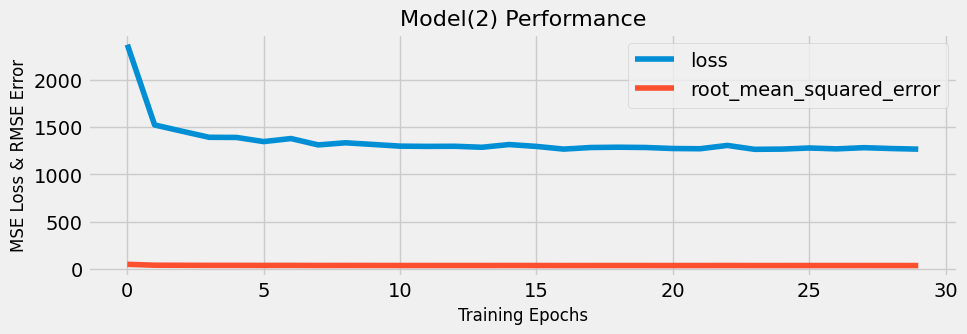

In [232]:
pd.DataFrame(history2.history).plot(figsize = (10,3))
plt.gca()
plt.title('Model(2) Performance', fontsize = 16)
plt.xlabel('Training Epochs', fontsize = 12)
plt.ylabel('MSE Loss & RMSE Error', fontsize = 12)
plt.show()


### Model (3)

In [233]:
model3 = keras.Sequential([
    keras.layers.Input(shape = input_shape),
    keras.layers.Dense(300, activation = 'linear'),
    keras.layers.Dense(300, activation = 'selu'),
    keras.layers.Dense(300, activation = 'selu'),
    keras.layers.Dense(300, activation = 'selu'),
    keras.layers.Dense(300, activation = 'selu'),
    keras.layers.Dense(1, activation = 'linear')
    ])

model3.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [keras.metrics.RootMeanSquaredError()])

history3 = model3.fit(X_train, y_train, epochs = 30)


Epoch 1/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 2856.5066 - root_mean_squared_error: 52.5659
Epoch 2/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1583.0010 - root_mean_squared_error: 39.7618
Epoch 3/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1500.4951 - root_mean_squared_error: 38.7248
Epoch 4/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1425.6239 - root_mean_squared_error: 37.7240
Epoch 5/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1455.5620 - root_mean_squared_error: 38.1350
Epoch 6/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1391.1345 - root_mean_squared_error: 37.2887
Epoch 7/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1375.6708 - root_mean_squared_error: 37.0669
Epoch 8/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1382.1873 - root_mean_squared_error: 37.1325
Epoch 9/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1410.1740 - root_mean_squared_error: 37.5391
Epoch 10/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/ste

In [234]:
model3.evaluate(X_test, y_test)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1870.0244 - root_mean_squared_error: 43.0887


[1745.499267578125, 41.779170989990234]

In [235]:
y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)

r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(0.31203036534067363, 0.14619187734017736)

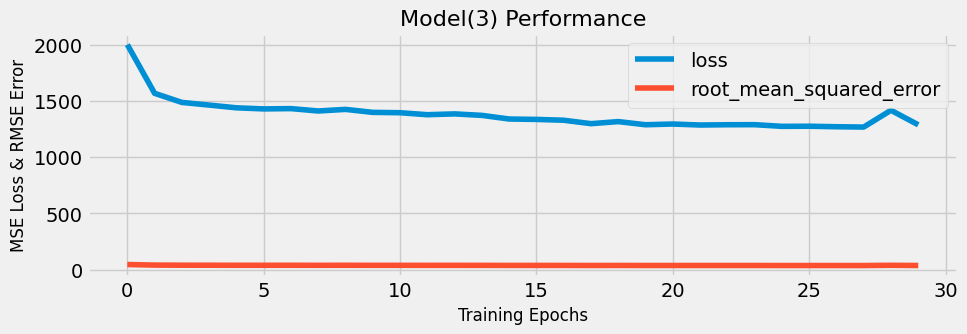

In [236]:
pd.DataFrame(history3.history).plot(figsize = (10,3))
plt.gca()
plt.title('Model(3) Performance', fontsize = 16)
plt.xlabel('Training Epochs', fontsize = 12)
plt.ylabel('MSE Loss & RMSE Error', fontsize = 12)
plt.show()


# Comparing Models

| Model |  train_Score | test_Score | train_MSE | test_MSE | train_RMSE | test_RMSE | train_MAE | test_MAE |
|-------|-----------------|------|-----|----|----|---|---|---|
|	LinearRegression	|	0.98	|	0.97	|	41.23	|	55.42	|	6.42	|	7.44	|	3.92	|	4.42	|
|	DecisionTreeRegressor	|	1	|	0.99	|	0	|	19.49	|	0	|	4.42	|	0	|	1.19	|
|	RandomForestRegressor	|	1	|	0.99	|	0.56	|	12.89	|	0.75	|	3.59	|	0.24	|	0.65	|
|	KNearestNeighborRegressor	|	0.75	|	0.65	|	463.13	|	716.86	|	21.52	|	26.77	|	11.66	|	14.41	|
|	Neural Network - Model (1)	|	0.26	|	0.15	|	1339.13	|	1735.52	|	36.57	|	41.65	|		|		|
|	Neural Network - Model (2)	|	0.31	|	0.1439	|	1240.81	|	1749.98	|	35.17	|	41.83 |		|		|
|	Neural Network - Model (3)	|	0.31	|	0.14	|	1308.81	|	1745.49	|	36.1547	|	41.77	|		|		|

# Saving the Model

In [237]:
# choosing Linear Regression Model

reg_model = LinearRegression().fit(X_train, y_train)
with open('Real_Estate_Price_Prediction_Bengaluru_Project.pickle','wb') as f:
    pickle.dump(reg_model, f)


***
**End of Project**